## 목표: 
    - count예측하기
## 열의 의미
- datetime시간별 날짜
- season 1,2,3,4 봄여름가을겨율
- holiday 휴일인지 여부
- workingday	일하는 날인지 여부
- weather 1: 최상 4:최악
- temp 섭씨 온도
- atetemp 체감기온
- humidity 상대습도
- casual 미등록 사용자 대여수
- registered 등록된 사용자 대여수
- count 총 대여수

22년5월30일 시작 
<br>
EDA에 관한 코드임

# 데이터 불러오기 및 기본 정보

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
train=pd.read_csv('../data/train.csv')
test=pd.read_csv('../data/test.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [56]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


train에 casual,registered,count가 추가로 있음

In [57]:
df_list=[train, test]
for i in df_list:
    print('---shape---')
    print(i.shape)
    print()
    print('---null---')
    print(i.isnull().sum())
    print('---null---')
    print(i.info())
    print('-' * 22)
    #null 값은 없다.

---shape---
(10886, 12)

---null---
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64
---null---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [58]:
for i in df_list:
    print('-' * 22)
    print(sum(i.duplicated()))
    print()
#중복값 역시 없다.

----------------------
0

----------------------
0



# 타겟변수 확인

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

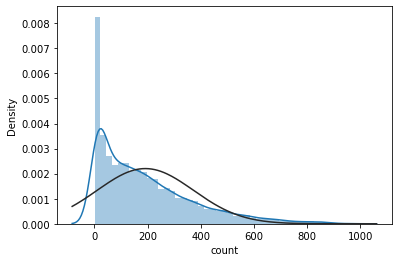

In [59]:
target=train['count']

from scipy import stats
from scipy.stats import norm

sns.distplot(train['count'], fit=norm)

((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([  1,   1,   1, ..., 968, 970, 977], dtype=int64)),
 (169.82942673231383, 191.5741319125482, 0.9372682766213166))

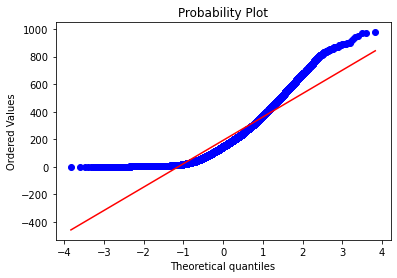

In [60]:
stats.probplot(train['count'],plot=plt)

왼쪽으로 치우쳐저 있기에 log나 root로 변환해보려한다.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='logCount', ylabel='Density'>

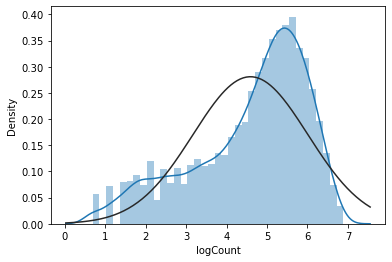

In [61]:
train['logCount']=np.log(target+1)

sns.distplot(train['logCount'], fit=norm)

((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.87626461, 6.87832647,
         6.88550967])),
 (1.364739645924417, 4.591363690454027, 0.9611793780126944))

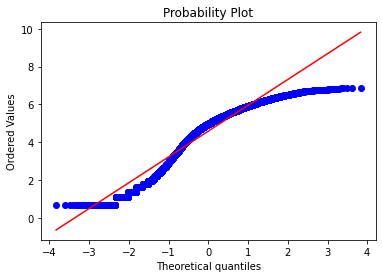

In [62]:
stats.probplot(train['logCount'],plot=plt)

왜도편중이 조금이나마 나아짐
- 왜도=정규분포에 비해서 얼마나 비대칭인가?
- 오른쪽(양수)왼쪽(음수)

# 데이터 합치기

In [63]:
featureNames=list(test)
df_train=train[featureNames]
df=pd.concat((df_train,test))

train.shape, test.shape, df.shape

((10886, 13), (6493, 9), (17379, 9))

# datetime 조절

In [64]:
import datetime

tmp=pd.to_datetime(train['datetime'])

df['datetime']=pd.to_datetime(df['datetime'])
df['day']=df['datetime'].dt.day
df['hour']=df['datetime'].dt.hour
df['dayofweek']=df['datetime'].dt.dayofweek
df['month']=df['datetime'].dt.month
df['year']=df['datetime'].dt.year
df['weekend']=(df['dayofweek']==5)|(df['dayofweek']==6)

df=df.drop(['datetime'],axis=1)

In [65]:
train['datetime']=pd.to_datetime(train['datetime'])
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['dayofweek']=train['datetime'].dt.dayofweek
train['month']=train['datetime'].dt.month
train['year']=train['datetime'].dt.year
train['weekend']=(train['dayofweek']==5)|(train['dayofweek']==6)


<AxesSubplot:xlabel='day', ylabel='count'>

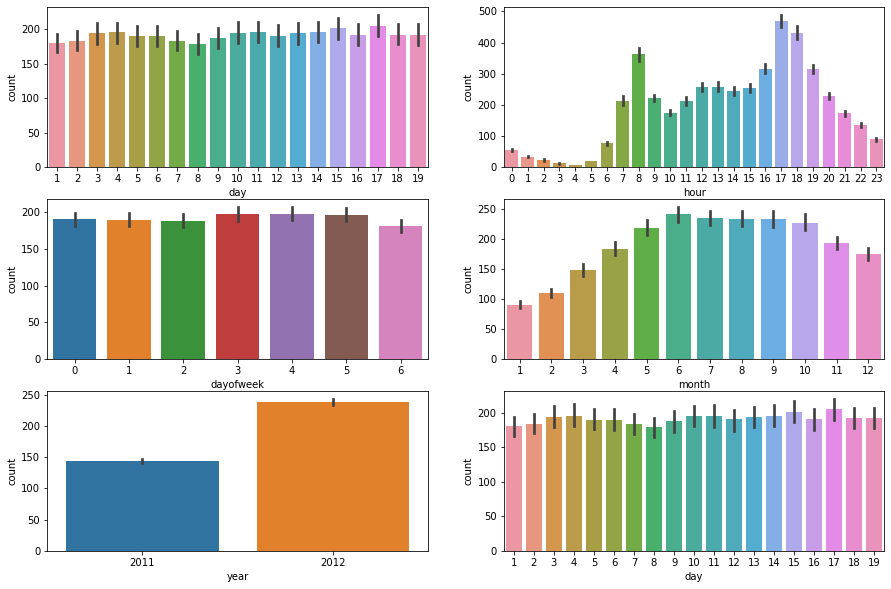

In [66]:
figure, axs=plt.subplots(3,2,figsize=(15,10))
sns.barplot(data=train, x='day', y=target,ax=axs[0][0])
sns.barplot(data=train, x='hour', y=target,ax=axs[0][1])
sns.barplot(data=train, x='dayofweek', y=target,ax=axs[1][0])
sns.barplot(data=train, x='month', y=target,ax=axs[1][1])
sns.barplot(data=train, x='year', y=target,ax=axs[2][0])
sns.barplot(data=train, x='day', y=target,ax=axs[2][1])

12년에 대여량이 증가
/월별로 보면 여름에 대여향이 높은것으로 추정
/시간대 별로는 출퇴근 시간에 많아 봉미
/요일 월별 차이는 거의 없음=>월별이라기보단 계절별차이

In [67]:
df=df.drop(columns=['day','month'])

   # season

<AxesSubplot:xlabel='season', ylabel='count'>

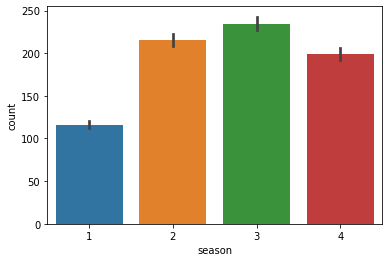

In [68]:
sns.barplot(data=df[:len(train)], x='season',y=target)

In [69]:
season_encoded=pd.get_dummies(df['season'], prefix='season')
df=pd.concat((df,season_encoded),axis=1)
df=df.drop(columns='season')

#카테고리형 데이터여서 모델링을 위해 더미변수화

# holiday

<AxesSubplot:xlabel='holiday', ylabel='count'>

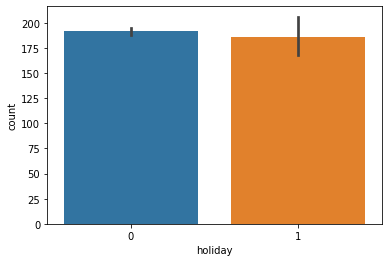

In [70]:
sns.barplot(data=df[:len(train)], x='holiday',y=target)
#카테고리형 데이터

# workingday

<AxesSubplot:xlabel='workingday', ylabel='count'>

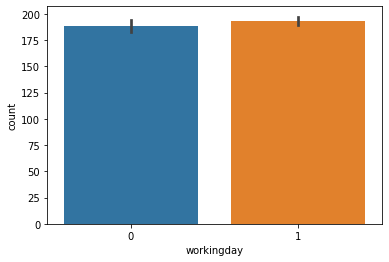

In [71]:
sns.barplot(data=df[:len(train)], x='workingday',y=target)
#카테고리형 데이터

# weather

<AxesSubplot:xlabel='weather', ylabel='count'>

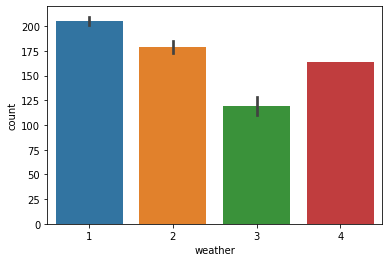

In [72]:
sns.barplot(data=df[:len(train)], x='weather',y=target)

In [73]:
weather_encoded=pd.get_dummies(df['weather'], prefix='weather')
df=pd.concat((df,weather_encoded),axis=1)
df=df.drop(columns='weather')

#카테고리형 데이터여서 더미변수화

<AxesSubplot:xlabel='hour', ylabel='count'>

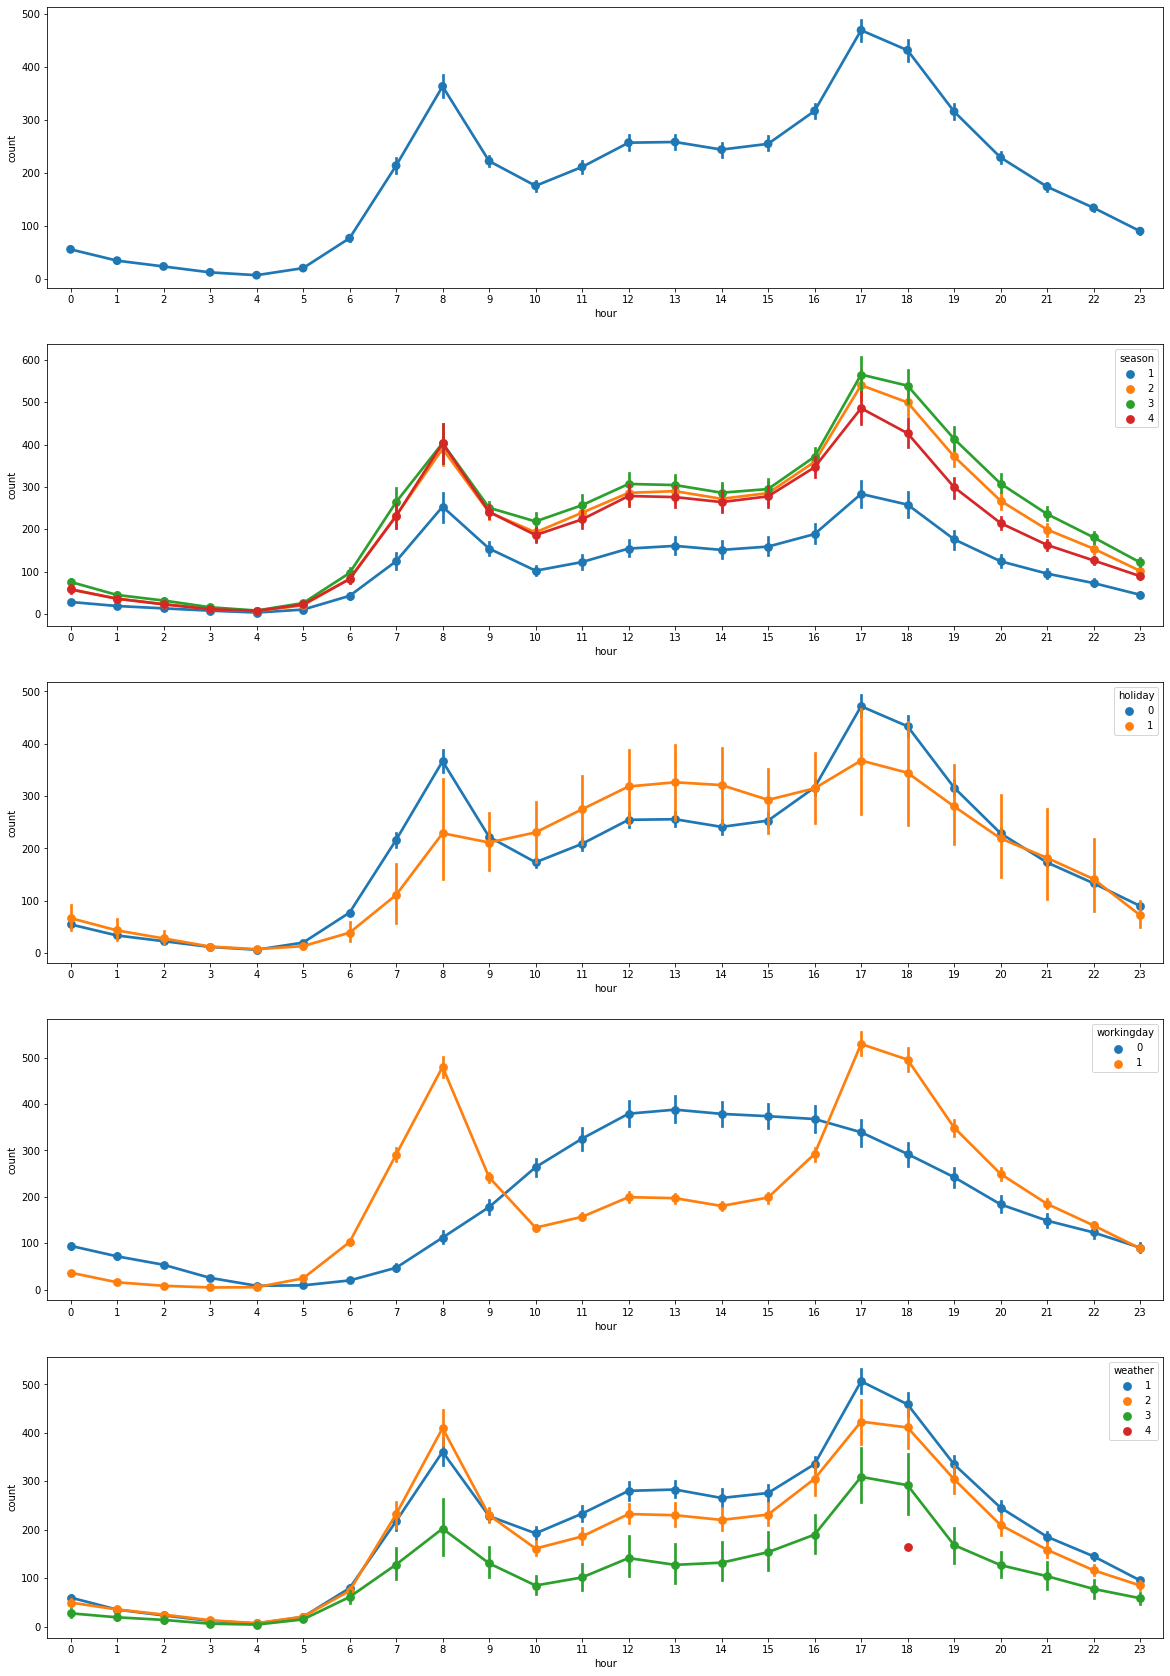

In [74]:
fig, (ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=5)
fig.set_size_inches(20,30)

sns.pointplot(data=train, x="hour", y="count",ax=ax1)
# 출퇴근시간에 대여량이 높음
sns.pointplot(data=train, x="hour", y="count",ax=ax2, hue="season")
# 봄에 대여량이 낮음
sns.pointplot(data=train, x="hour", y="count",ax=ax3, hue="holiday")
# 쉬는 날에는 출퇴슨 시간이 아니라 낮 시간에 대여량이 높음
sns.pointplot(data=train, x="hour", y="count",ax=ax4, hue="workingday")
# 날씨가 좋으면 빌리는 량이 높고 4에는 없다고 봐도 됨
sns.pointplot(data=train, x="hour", y="count",ax=ax5, hue="weather")

# 왜도확인

In [75]:
from scipy.stats import skew
skew=df.apply(lambda x: skew(x))
skew.sort_values(ascending=False)

weather_4     76.092051
holiday        5.638051
weather_3      3.055531
season_4       1.195185
season_1       1.191551
season_2       1.132099
season_3       1.102009
weather_2      1.085650
weekend        0.933592
windspeed      0.574856
temp          -0.006020
dayofweek     -0.009235
year          -0.010242
hour          -0.010679
atemp         -0.090421
humidity      -0.111278
weather_1     -0.660109
workingday    -0.785190
dtype: float64

In [76]:
skew=skew[abs(skew)>0.5]
skew

holiday        5.638051
workingday    -0.785190
windspeed      0.574856
weekend        0.933592
season_1       1.191551
season_2       1.132099
season_3       1.102009
season_4       1.195185
weather_1     -0.660109
weather_2      1.085650
weather_3      3.055531
weather_4     76.092051
dtype: float64

나머지는 이해되는데 바람(수치형)은 왜도가 왜이러지?

# 상관도

In [77]:
cor=train.iloc[:,1:-1].corr()
cor.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,logCount,day,hour,dayofweek,month,year
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,0.160452,0.001729,-0.006546,-0.010553,0.971524,-0.004797
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.001231,-0.015877,-0.000354,-0.191832,0.001731,0.012021
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.015326,0.009829,0.002780,-0.704267,-0.003394,-0.002482
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.108005,-0.007890,-0.022740,-0.047692,0.012144,-0.012548
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.376587,0.015551,0.145430,-0.038466,0.257589,0.061226


<AxesSubplot:>

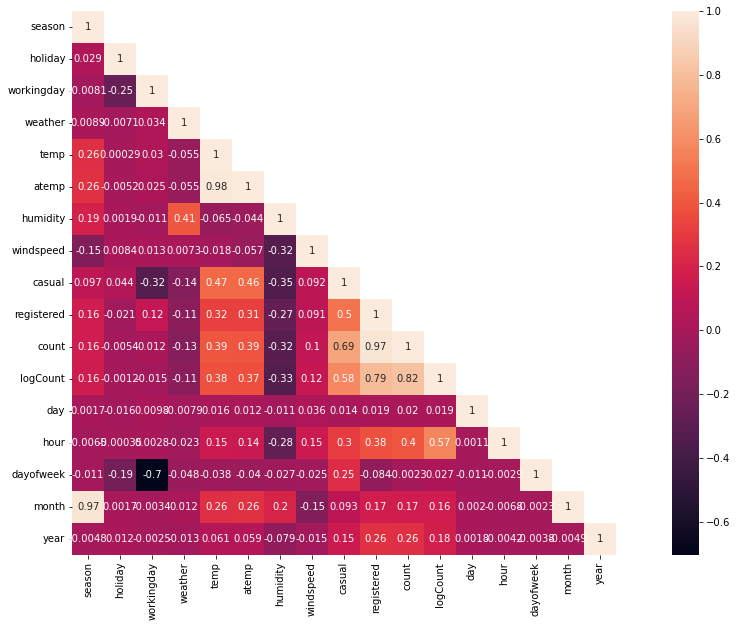

In [78]:
mask=np.array(cor)
mask[np.tril_indices_from(mask)]=False
fig, ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(cor, mask=mask,square=True, annot=True)

temp와 humidity 상관관계를 가지고 있기에 다중공선성 확인
count와  temp humidity, windspeed를 고려하려함

# 다중공선성

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=df.iloc[:,:6]
vif_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     17379 non-null  int64  
 1   workingday  17379 non-null  int64  
 2   temp        17379 non-null  float64
 3   atemp       17379 non-null  float64
 4   humidity    17379 non-null  int64  
 5   windspeed   17379 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 950.4 KB


In [80]:
vif=pd.DataFrame()
vif["Features"]=vif_data.columns
vif['vif']=[variance_inflation_factor(
           vif_data.values,i) for i in range(vif_data.shape[1])]
vif.sort_values(by='vif', ascending=False)

#vif가 10이상이면 다중공선성이 존재한므로  atemp 와 tempㄴ는 주성분 분석으로 차원을 줄여보기로 함

,Features,vif
3,atemp,342.955195
2,temp,316.903766
4,humidity,6.362670
1,workingday,3.167607
5,windspeed,2.782781
0,holiday,1.085231


# PCA

In [81]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
pca.fit(df[['temp','atemp']])

PCA(n_components=1)

In [82]:
pca.explained_variance_ratio_

array([0.99388034])

In [83]:
df['pca']=pca.fit_transform(df[['temp','atemp']])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pca', ylabel='Density'>

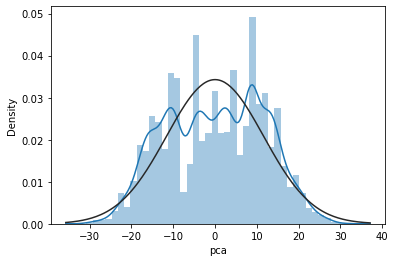

In [84]:
sns.distplot(df['pca'], fit=norm)

수치형 변수

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='windspeed', ylabel='count'>

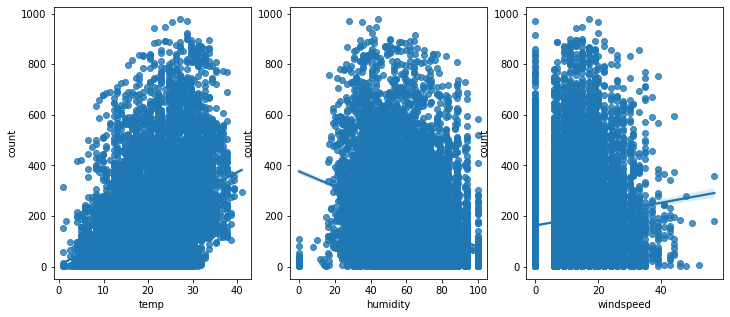

In [85]:
fig,[ax1,ax2,ax3]=plt.subplots(1,3)
fig.set_size_inches(12,5)
sns.regplot(train['temp'],'count', data=train, ax=ax1)
sns.regplot(train['humidity'],'count', data=train, ax=ax2)
sns.regplot(train['windspeed'],'count', data=train, ax=ax3)

In [86]:
stats.pearsonr(train['temp'],target)

(0.3944536449672491, 0.0)

<AxesSubplot:xlabel='windspeed', ylabel='count'>

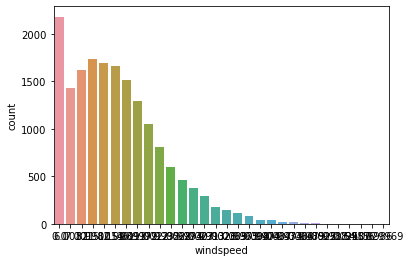

In [87]:
sns.countplot(data=df, x='windspeed')
#0인 경우가 너무 많아 보임

windspeed

In [88]:
df.loc[df['windspeed']==0, 'windspeed']=df['windspeed'].mean()
#평균으로 0을 바꿈

범주형 변수

<AxesSubplot:xlabel='year', ylabel='count'>

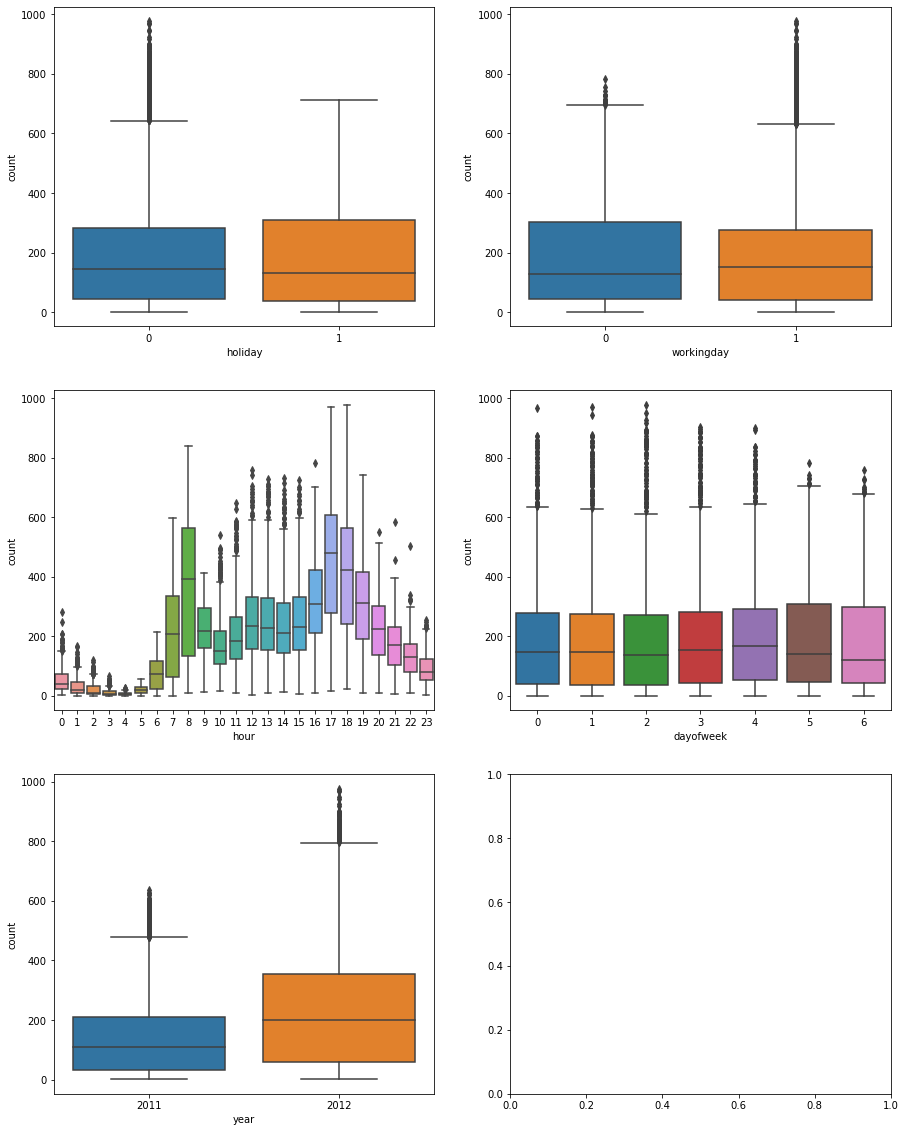

In [90]:
fig, axes=plt.subplots(nrows=3, ncols=2, figsize=(15,20))
sns.boxplot(data=train, y='count', x='holiday', orient='v', ax=axes[0][0])
sns.boxplot(data=train, y='count', x='workingday', orient='v', ax=axes[0][1])
sns.boxplot(data=train, y='count', x='hour', orient='v', ax=axes[1][0])
sns.boxplot(data=train, y='count', x='dayofweek', orient='v', ax=axes[1][1])
sns.boxplot(data=train, y='count', x='year', orient='v', ax=axes[2][0])

# 모델링

In [91]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression

In [92]:
new_train=df[:train.shape[0]]
new_test=df[train.shape[0]:]

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  logCount    10886 non-null  float64       
 13  day         10886 non-null  int64         
 14  hour        10886 non-null  int64         
 15  dayofweek   10886 non-null  int64         
 16  month       10886 non-

In [98]:
target=train['logCount']

## train_test_split

In [99]:
X_train, X_val, y_train, y_val= train_test_split(new_train, target, test_size=0.2, shuffle=True)

## RMSLE Score

In [ ]:
def rmsleScore(preds, true):
    rmsle_score=(np.sum((np.log1p(preds)-np.log1p(true))**2)/len(true))**0.5
    return rmsle_score

In [106]:
pip install sklearn.metrics.SCORERS

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.metrics.SCORERS (from versions: none)
ERROR: No matching distribution found for sklearn.metrics.SCORERS


In [109]:
from sklearn.metrics import make_scorer
RMSLE=make_scorer(rmsleScore)

make_scorer(rmsleScore)

## 단순선형회귀

In [111]:
import statsmodels.api as sm
model= sm.OLS(target.values, new_train.astype(float))

re=model.fit()
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     712.1
Date:                Tue, 31 May 2022   Prob (F-statistic):               0.00
Time:                        17:51:58   Log-Likelihood:                -15534.
No. Observations:               10886   AIC:                         3.110e+04
Df Residuals:                   10870   BIC:                         3.122e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       -0.5427      0.050    -10.829      0.000      -0.641      -0.444
workingday    -0.5614      0.035    -16.259      0.000      -0.629      -0.494
temp         -17.8485      0.849    -21.032      0.000     -19.512     -16.185
atemp        -19.4658      0.924    -21.064      0.000     -21.277     -17.654
humidity      -0.0134      0.001    -21.137      0.000      -0.015      -0.012
windspeed      0.0041      0.002      2.616      0.009       0.001       0.007
hour           0.0978      0.001     65.327      0.000       0.095       0.101
dayofweek      0.0322      0.008      3.970      0.000       0.016       0.048
year           0.4139      0.020     21.167      0.000       0.376       0.452
weekend       -0.5845      0.042    -14.078      0.000      -0.666      -0.503
season_1      -0.6101      0.032    -18.834      0.000      -0.674      -0.547
season_2      -0.4403      0.026    -16.756      0.000      -0.492      -0.389
season_3      -0.5726      0.031    -18.312      0.000      -0.634      -0.511
season_4      -0.0656      0.028     -2.352      0.019      -0.120      -0.011
weather_1     -0.6533      0.253     -2.579      0.010      -1.150      -0.157
weather_2     -0.5089      0.253     -2.008      0.045      -1.006      -0.012
weather_3     -0.8880      0.254     -3.493      0.000      -1.386      -0.390
weather_4      0.3616      0.758      0.477      0.633      -1.124       1.847
pca           26.4493      1.254     21.084      0.000      23.990      28.908
==============================================================================
Omnibus:                      117.157   Durbin-Watson:                   0.527
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.774
Skew:                          -0.258   Prob(JB):                     5.95e-27
Kurtosis:                       3.017   Cond. No.                     3.35e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.93e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

p_value가 유의수준 0.05보다 낮다.